In [320]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [321]:
warnings.filterwarnings('ignore')

In [322]:
data = pd.read_csv("/content/HINDALCO.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HINDALC0,EQ,813.45,851.00,878.50,851.0,869.0,867.45,869.86,33799,2.940055e+12,NaN,NaN,NaN
1,2000-01-04,HINDALC0,EQ,867.45,879.00,930.00,870.0,900.0,900.35,903.51,70944,6.409848e+12,NaN,NaN,NaN
2,2000-01-05,HINDALC0,EQ,900.35,835.00,972.40,835.0,972.4,972.35,949.32,153030,1.452744e+13,NaN,NaN,NaN
3,2000-01-06,HINDALC0,EQ,972.35,1050.15,1050.15,1015.1,1045.0,1048.45,1047.08,129708,1.358144e+13,NaN,NaN,NaN
4,2000-01-07,HINDALC0,EQ,1048.45,1096.00,1120.00,1015.0,1086.0,1094.95,1085.24,138829,1.506623e+13,NaN,NaN,NaN


In [323]:
data.drop(['Date'], axis=1, inplace=True)

In [324]:
print(data.head())
print(data.shape)
print(data.columns)

     Symbol Series  Prev Close     Open     High     Low    Last    Close  \
0  HINDALC0     EQ      813.45   851.00   878.50   851.0   869.0   867.45   
1  HINDALC0     EQ      867.45   879.00   930.00   870.0   900.0   900.35   
2  HINDALC0     EQ      900.35   835.00   972.40   835.0   972.4   972.35   
3  HINDALC0     EQ      972.35  1050.15  1050.15  1015.1  1045.0  1048.45   
4  HINDALC0     EQ     1048.45  1096.00  1120.00  1015.0  1086.0  1094.95   

      VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0   869.86   33799  2.940055e+12     NaN                 NaN          NaN  
1   903.51   70944  6.409848e+12     NaN                 NaN          NaN  
2   949.32  153030  1.452744e+13     NaN                 NaN          NaN  
3  1047.08  129708  1.358144e+13     NaN                 NaN          NaN  
4  1085.24  138829  1.506623e+13     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last'

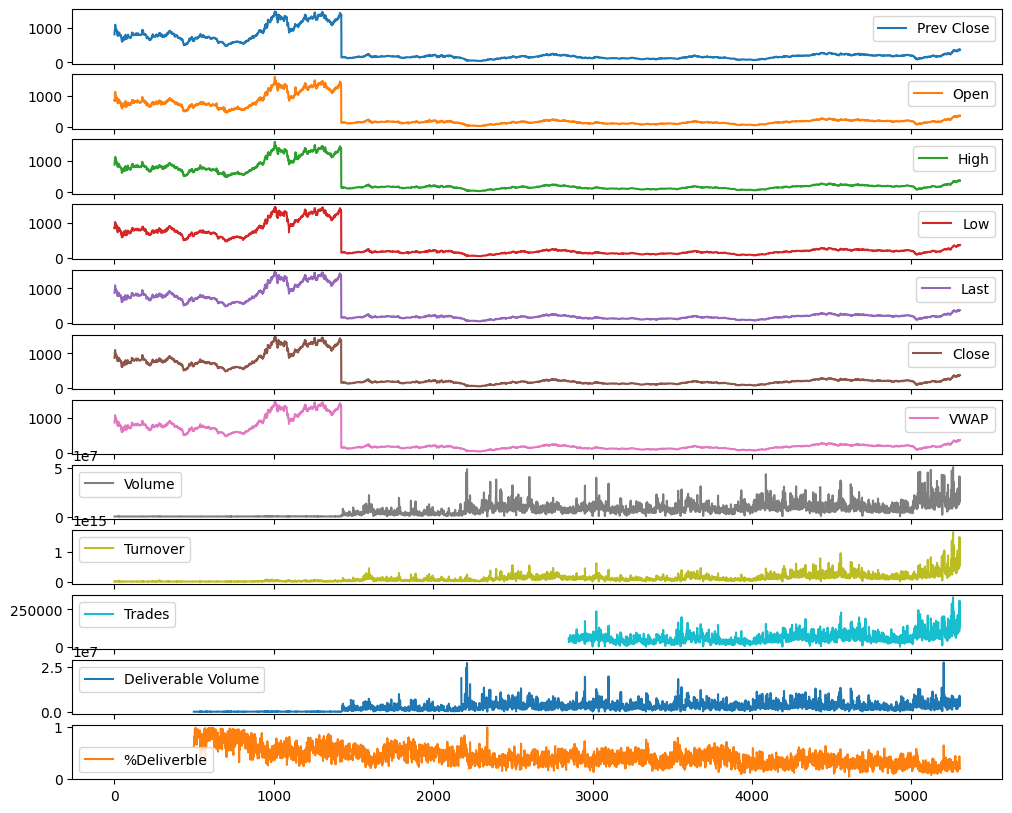

Symbol                   2
Series                   1
Prev Close            3779
Open                  2889
High                  3256
Low                   3236
Last                  3384
Close                 3779
VWAP                  4911
Volume                5300
Turnover              5306
Trades                2426
Deliverable Volume    4776
%Deliverble           3233
dtype: int64

In [325]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [326]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,HINDALC0,EQ,813.45,851.00,878.50,851.0,869.0,867.45,869.86,33799,2.940055e+12,NaN,NaN,NaN
1,HINDALC0,EQ,867.45,879.00,930.00,870.0,900.0,900.35,903.51,70944,6.409848e+12,NaN,NaN,NaN
2,HINDALC0,EQ,900.35,835.00,972.40,835.0,972.4,972.35,949.32,153030,1.452744e+13,NaN,NaN,NaN
3,HINDALC0,EQ,972.35,1050.15,1050.15,1015.1,1045.0,1048.45,1047.08,129708,1.358144e+13,NaN,NaN,NaN
4,HINDALC0,EQ,1048.45,1096.00,1120.00,1015.0,1086.0,1094.95,1085.24,138829,1.506623e+13,NaN,NaN,NaN


        Symbol Series  Prev Close     Open     High     Low     Last    Close  \
0     HINDALC0     EQ      813.45   851.00   878.50   851.0   869.00   867.45   
1     HINDALC0     EQ      867.45   879.00   930.00   870.0   900.00   900.35   
2     HINDALC0     EQ      900.35   835.00   972.40   835.0   972.40   972.35   
3     HINDALC0     EQ      972.35  1050.15  1050.15  1015.1  1045.00  1048.45   
4     HINDALC0     EQ     1048.45  1096.00  1120.00  1015.0  1086.00  1094.95   
...        ...    ...         ...      ...      ...     ...      ...      ...   
5301  HINDALCO     EQ      349.50   353.00   358.25   345.5   348.60   348.35   
5302  HINDALCO     EQ      348.35   350.10   370.00   350.1   366.00   366.25   
5303  HINDALCO     EQ      366.25   368.85   368.90   358.0   362.45   362.60   
5304  HINDALCO     EQ      362.60   367.40   377.30   364.6   370.50   372.15   
5305  HINDALCO     EQ      372.15   368.90   377.00   361.3   363.65   364.40   

         VWAP    Volume    

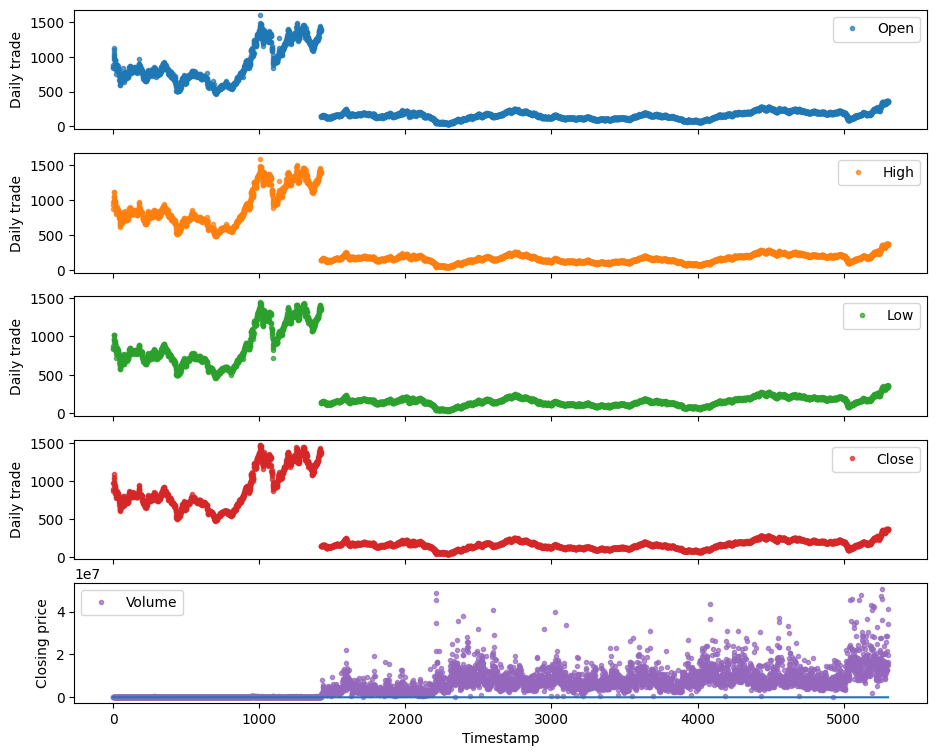

In [327]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [328]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     525
%Deliverble            525
dtype: int64

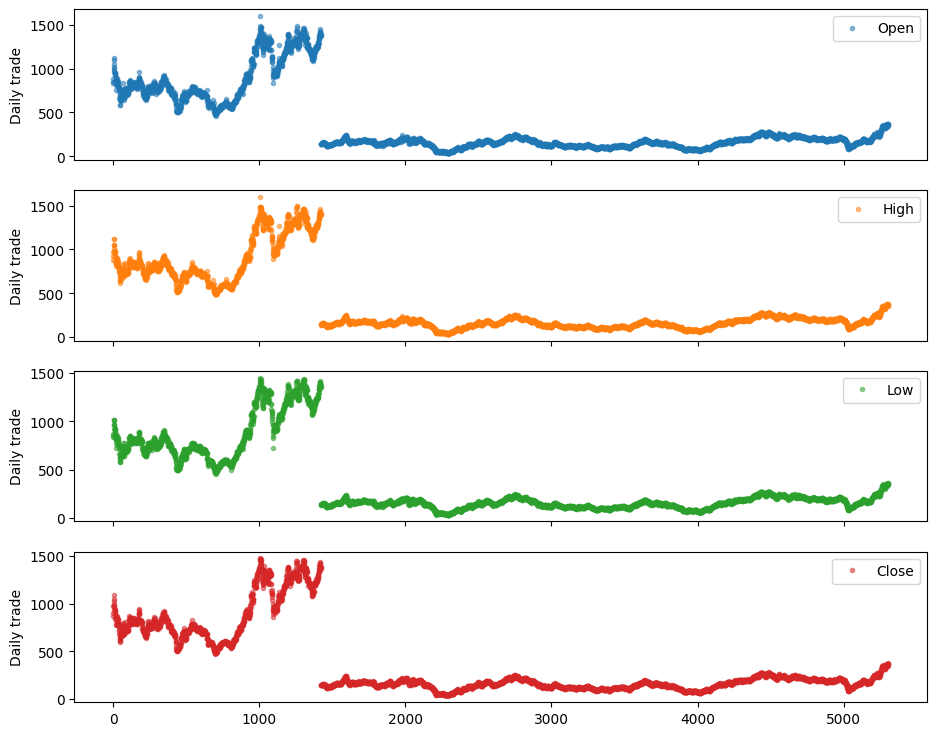

In [329]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

        Symbol Series  Prev Close     Open     High     Low     Last    Close  \
0     HINDALC0     EQ      813.45   851.00   878.50   851.0   869.00   867.45   
1     HINDALC0     EQ      867.45   879.00   930.00   870.0   900.00   900.35   
2     HINDALC0     EQ      900.35   835.00   972.40   835.0   972.40   972.35   
3     HINDALC0     EQ      972.35  1050.15  1050.15  1015.1  1045.00  1048.45   
4     HINDALC0     EQ     1048.45  1096.00  1120.00  1015.0  1086.00  1094.95   
...        ...    ...         ...      ...      ...     ...      ...      ...   
5301  HINDALCO     EQ      349.50   353.00   358.25   345.5   348.60   348.35   
5302  HINDALCO     EQ      348.35   350.10   370.00   350.1   366.00   366.25   
5303  HINDALCO     EQ      366.25   368.85   368.90   358.0   362.45   362.60   
5304  HINDALCO     EQ      362.60   367.40   377.30   364.6   370.50   372.15   
5305  HINDALCO     EQ      372.15   368.90   377.00   361.3   363.65   364.40   

         VWAP    Volume    

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,3.557385e+02,3.560146e+02,3.740000e+01,1.359500e+02,1.840250e+02,5.655500e+02,1.472600e+03
Open,5306.0,3.560851e+02,3.565966e+02,3.700000e+01,1.360000e+02,1.840000e+02,5.610000e+02,1.599000e+03
High,5306.0,3.625017e+02,3.624593e+02,3.840000e+01,1.388125e+02,1.879000e+02,5.749750e+02,1.599000e+03
Low,5306.0,3.493419e+02,3.501426e+02,3.675000e+01,1.335625e+02,1.810000e+02,5.546000e+02,1.450000e+03
Last,5306.0,3.556801e+02,3.559384e+02,3.750000e+01,1.361125e+02,1.840000e+02,5.650000e+02,1.475000e+03
Close,5306.0,3.556539e+02,3.559592e+02,3.740000e+01,1.359500e+02,1.840250e+02,5.646750e+02,1.472600e+03
VWAP,5306.0,3.558792e+02,3.561973e+02,3.774000e+01,1.360875e+02,1.843900e+02,5.619050e+02,1.461420e+03
Volume,5306.0,6.320499e+06,6.266133e+06,6.200000e+01,2.467105e+05,5.492389e+06,9.319115e+06,5.067723e+07
Turnover,5306.0,1.056218e+14,1.226098e+14,4.773755e+09,1.927090e+13,7.532902e+13,1.462953e+14,1.667374e+15
Trades,2456.0,6.063951e+04,3.442993e+04,2.598000e+03,3.808100e+04,5.239900e+04,7.376750e+04,3.295610e+05


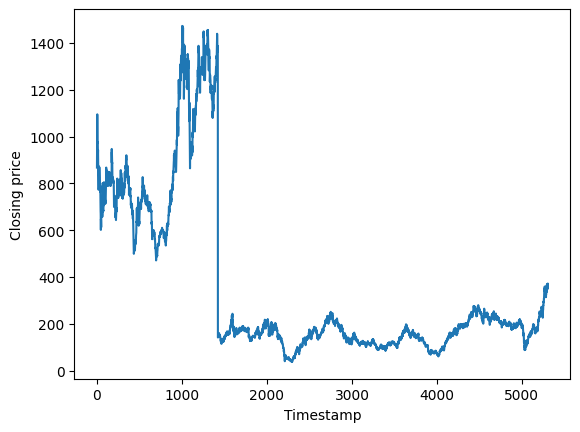

In [330]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [331]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [332]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 12ms/step - loss: 0.0398 - mse: 0.0398 - mae: 0.1238 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0642
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0512 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0566
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0446 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0478
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0396 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0440
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0358 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0396
Epoch 6/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0334 - val_loss: 0.0023 - val_mse: 0.0023 - val_mae: 0.0360
Epoch 7/100
66/66 [==

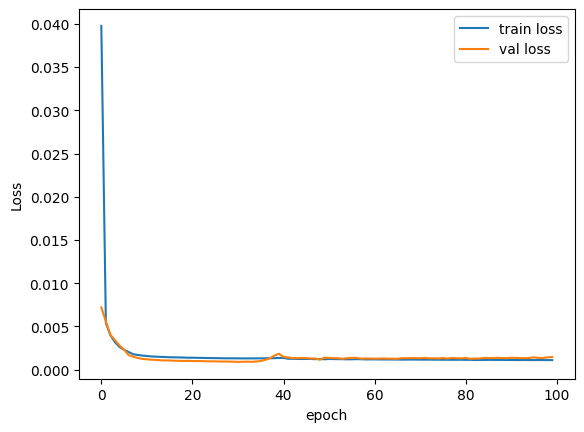

In [333]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

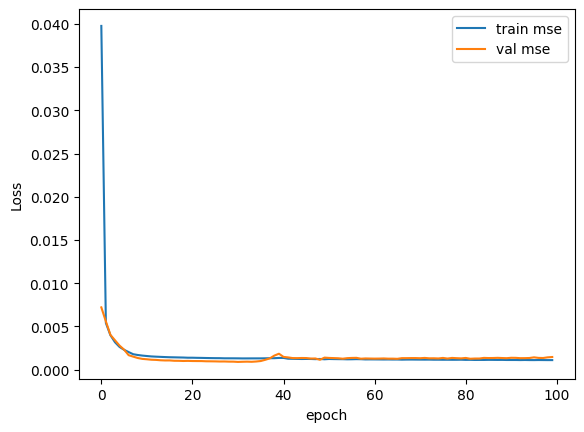

In [334]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

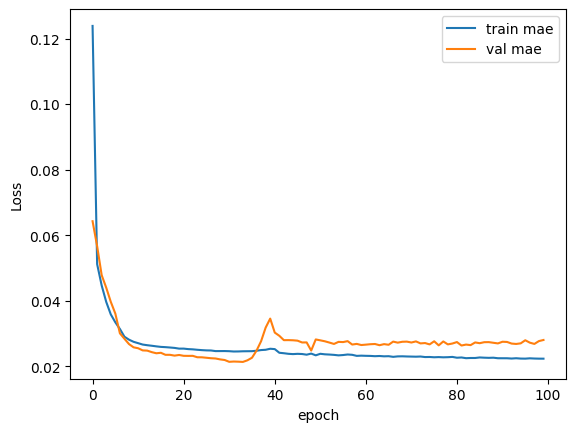

In [335]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_25 (LSTM)              (None, 32)                6272      
                                                                 
 dense_60 (Dense)            (None, 64)                2112      
                                                                 
 dense_61 (Dense)            (None, 64)                4160      
                                                                 
 activation_36 (Activation)  (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 64)                4160      
                                                                 
 activation_37 (Activation)  (None, 64)              

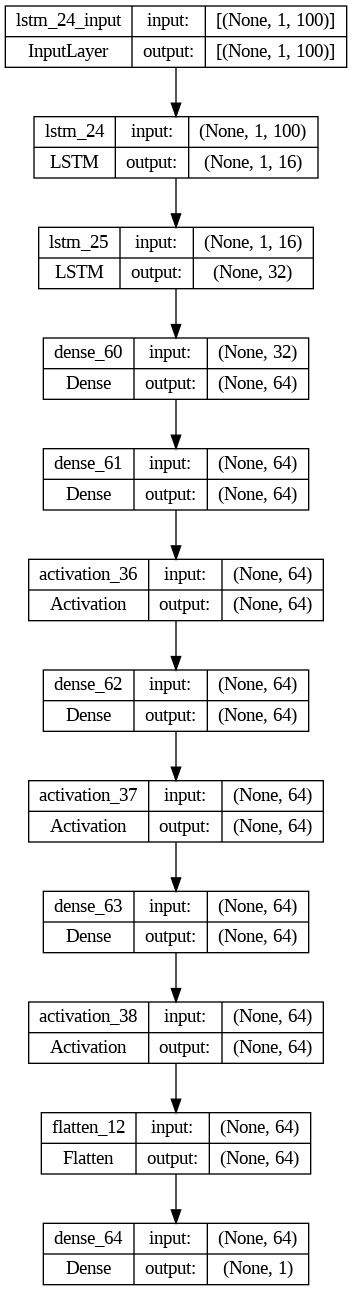

In [336]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [337]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0280


[0.0014616382541134953, 0.0014616382541134953, 0.027998529374599457]

In [338]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.991324
R2 Score: 0.987865
Max Error: 0.305045


33/33 [==============================] - 0s 1ms/step


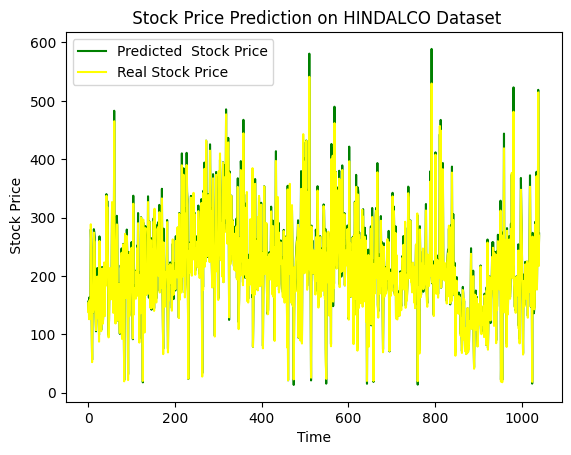

In [339]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on HINDALCO Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

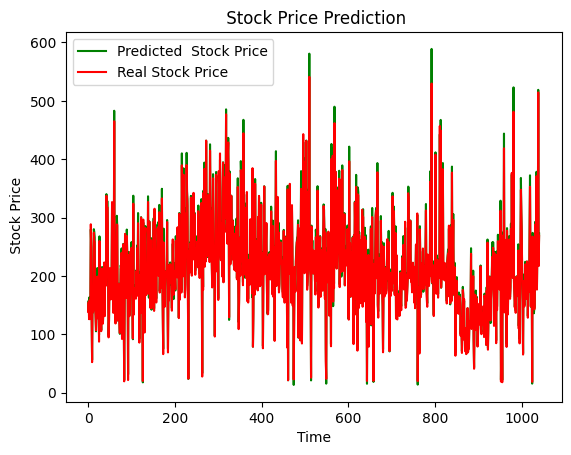

In [340]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [341]:
predicted

array([[142.52301],
       [157.48062],
       [134.00992],
       ...,
       [518.7836 ],
       [223.92638],
       [272.6171 ]], dtype=float32)

In [342]:
test_label

array([[138.62229465],
       [155.13997729],
       [126.00793798],
       ...,
       [514.44464776],
       [216.97790954],
       [268.60649248]])

In [343]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0       138.622295       142.523010
1       155.139977       157.480621
2       126.007938       134.009918
3       157.880059       163.603073
4       126.027630       129.206787
...            ...              ...
1036    244.579876       254.788483
1037    239.980802       244.539795
1038    514.444648       518.783630
1039    216.977910       223.926376
1040    268.606492       272.617096

[1041 rows x 2 columns]


In [344]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 138.62229465449803 | 142.52301025390625 |
|  1   | 155.13997728563317 | 157.48062133789062 |
|  2   | 126.00793798449612 | 134.00991821289062 |
|  3   | 157.88005931274583 | 163.6030731201172  |
|  4   | 126.02762962962962 |  129.206787109375  |
|  5   | 135.72744318607965 | 142.87147521972656 |
|  6   |  288.556645316253  |     279.796875     |
|  7   | 244.1201603563474  |  249.47802734375   |
|  8   | 125.37910576247364 | 132.34402465820312 |
|  9   | 52.400943396226424 | 56.34928894042969  |
|  10  | 163.10872781065086 | 168.44650268554688 |
|  11  | 138.37757609606254 | 137.60731506347656 |
|  12  | 143.8071319852142  | 147.74351501464844 |
|  13  | 274.24624624624624 | 280.1099548339844  |
|  14  | 259.12751385589866 | 275.5513610839844  |
|  15  | 258.5547531992687  | 266.0093994140625  |
|  16  | 146.92767168919707 |  

In [345]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_25 (LSTM)              (None, 32)                6272      
                                                                 
 dense_60 (Dense)            (None, 64)                2112      
                                                                 
 dense_61 (Dense)            (None, 64)                4160      
                                                                 
 activation_36 (Activation)  (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 64)                4160      
                                                                 
 activation_37 (Activation)  (None, 64)              

In [346]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))